In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
genes=100; cells=500
x = np.zeros((genes, cells))


# generating synth data
mu1, sd1 = 2, 1
mu2, sd2 = 5, 1
mu3, sd3 = 10,1

x[:80,:] = np.random.normal(mu2, sd2, (80, 500))
x[80:, :250] = np.random.normal(mu1, sd2, (20, 250))
x[80:, 250:] = np.random. normal(mu3, sd3, (20, 250))

3


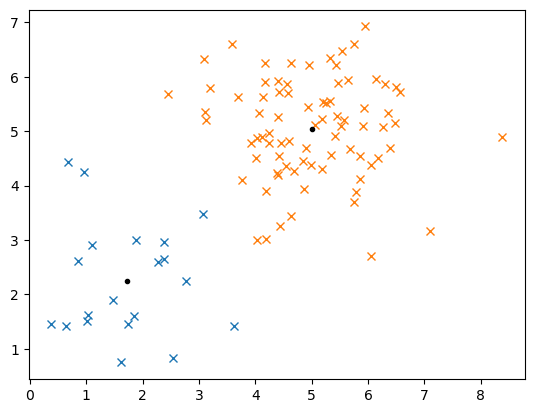

In [ ]:
#clustering
def kmeans(data, k, seed_init_cent = False, plot=False):
    # np.random.seed(random_seed) 
    dim = data.shape[1]
    points = data.shape[0]
    centroids = np.random.uniform(np.min(data), np.max(data), (k, dim))
    ids1 = np.ones(points) 
    ids2 = np.zeros(points)
    count = 0
    while np.array_equal(ids1, ids2) is False:
        ids1 = ids2.copy()
        for i in range(points):
            ids2[i] = np.argmin(np.linalg.norm(data[i,:] - centroids, axis=1))
        for j in range(k):
            if  np.any(ids2 == j):
                centroids[j,:] = data[ids2 == j].mean(axis=0)
        count += 1
    print(count)
    def visualize(data, ids2, k):
        for cluster in range(k):
            clusterdata = data[ids2 == cluster]
            plt.plot(clusterdata[:, 0], clusterdata[:,1], 'x')
        plt.plot(centroids[:,0], centroids[:, 1], 'o', color='black', markersize=3)
    
    if plot == True:
        visualize(data, ids2, k)
    
    return ids2, centroids

ids, centrs = kmeans(x, 2, plot=True)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


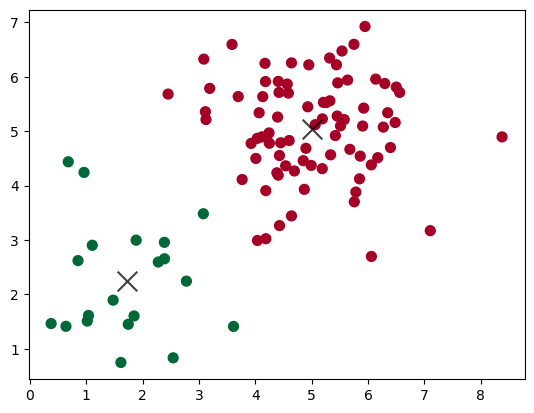

In [24]:
#  sklearn

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

# Plot the clustered data
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='RdYlGn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='x')